In [ ]:
import os
import json
from pprint import pprint
from copy import deepcopy

import numpy as np
import pandas as pd

In [ ]:
pdf_dirs = r'D:/1_SEM-06/4 NLP/dataset/document_parses/pdf_json/'
filenames = os.listdir(pdf_dirs)
print("Number of articles retrieved from our Dataset:", len(filenames))

pmc_dirs = r'D:/1_SEM-06/4 NLP/dataset/document_parses/pmc_json/'
filenames2 = os.listdir(pmc_dirs)
print("Number of articles retrieved from our Dataset:", len(filenames2))

Number of articles retrieved from our Dataset: 292221
Number of articles retrieved from our Dataset: 225681


In [ ]:
all_files = []

for filename in filenames[0:10000]:
    filename = pdf_dirs + filename
    file = json.load(open(filename, 'rb'))
    all_files.append(file)

In [ ]:
file = all_files[0]
print("Dictionary keys:", file.keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [ ]:
pprint(all_files[100]['abstract'])

[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Abstract',
  'text': 'In eukaryotic cells, protein sorting is a highly regulated '
          'mechanism important for many physiological events. After synthesis '
          'in the endoplasmic reticulum and trafficking to the Golgi '
          'apparatus, proteins sort to many different cellular destinations '
          'including the endolysosomal system and the extracellular space. '
          'Secreted proteins need to be delivered directly to the cell '
          'surface. Sorting of secreted proteins from the Golgi apparatus has '
          'been a topic of interest for over thirty years, yet there is still '
          'no clear understanding of the machinery that forms the post-Golgi '
          'carriers. Most evidence points to these post-Golgi carriers being '
          'tubular pleomorphic structures that bud from the trans-face of the '
          'Golgi. In this review, we present the background studies and '
          'hi

In [ ]:
print("body_text content:")
pprint(file['body_text'][:2], depth=3)

body_text content:
[{'cite_spans': [],
  'ref_spans': [],
  'section': 'Editor',
  'text': 'According to current live statistics at the time of editing this '
          'letter, Russia has been the third country in the world to be '
          'affected by COVID-19 with both new cases and death rates rising. It '
          'remains in a position of advantage due to the later onset of the '
          'viral spread within the country since the worldwide disease '
          'outbreak.'},
 {'cite_spans': [],
  'ref_spans': [],
  'section': 'Editor',
  'text': 'The first step in "fighting" the epidemic was nationwide lock down '
          'on March 30 th , 2020.'}]


In [ ]:
texts = [(di['section'], di['text']) for di in file['body_text']]
texts_di = {di['section']: "" for di in file['body_text']}
for section, text in texts:
    texts_di[section] += text

pprint(list(texts_di.keys()))

['Editor']


In [ ]:
body = ""

for section, text in texts_di.items():
    body += section
    body += "\n\n"
    body += text
    body += "\n\n"

print(body[:3000])

Editor

According to current live statistics at the time of editing this letter, Russia has been the third country in the world to be affected by COVID-19 with both new cases and death rates rising. It remains in a position of advantage due to the later onset of the viral spread within the country since the worldwide disease outbreak.The first step in "fighting" the epidemic was nationwide lock down on March 30 th , 2020.Most of the multidisciplinary hospitals have been repurposed as dedicated COVID-19 centres, so the surgeons started working as infectious disease specialists. Such a reallocation of health care capacity results in the effective management of this epidemiological problem 1 . The staff has undergone on-line 36-hour training course to become qualified in coronavirus infection treatment.The surgeons of COVID-19 dedicated hospitals do rarely practice surgery. When ICU patients need mechanical ventilation, percutaneous tracheostomy under endoscopic control is mostly performe

In [ ]:
print(all_files[0]['metadata']['title'])

"Multi-faceted" COVID-19: Russian experience


In [ ]:
authors = all_files[1]['metadata']['authors']
pprint(authors[:3])

[{'affiliation': {'institution': 'Uniformed Services University of the Health '
                                 'Sciences',
                  'laboratory': '',
                  'location': {'country': 'USA',
                               'region': 'Maryland',
                               'settlement': 'Bethesda'}},
  'email': '',
  'first': 'Alex',
  'last': 'Ba',
  'middle': ['Yang'],
  'suffix': ''},
 {'affiliation': {},
  'email': '',
  'first': '|',
  'last': 'Robert',
  'middle': [],
  'suffix': ''},
 {'affiliation': {'institution': 'Walter Reed National Military Medical Center',
                  'laboratory': '',
                  'location': {'country': 'USA',
                               'region': 'Maryland',
                               'settlement': 'Bethesda'}},
  'email': '',
  'first': 'J',
  'last': 'Lewis',
  'middle': [],
  'suffix': ''}]


In [ ]:
pprint(all_files[4]['metadata'], depth=4)

{'authors': [{'affiliation': {'institution': 'Instituto de Salud Carlos III',
                              'laboratory': 'Centro de Investigación '
                                            'Biome´dica en Red Enfermedades '
                                            'Cardiovaculares (CIBERCV)',
                              'location': {...}},
              'email': '',
              'first': 'Oriol',
              'last': 'Rodríguez-Leor',
              'middle': [],
              'suffix': ''},
             {'affiliation': {'institution': 'Santiago de Compostela, A Coruña',
                              'laboratory': '',
                              'location': {...}},
              'email': '',
              'first': '',
              'last': 'Belé N Cid-Á Lvarez',
              'middle': [],
              'suffix': ''},
             {'affiliation': {'institution': 'Hospital de León',
                              'laboratory': '',
                              'location': {...

In [ ]:
bibs = list(file['bib_entries'].values())
pprint(bibs[:2], depth=4)

[{'authors': [{'first': 'L', 'last': 'Tanaka', 'middle': [], 'suffix': ''},
              {'first': 'M', 'last': 'Alexandru', 'middle': [], 'suffix': ''},
              {'first': 'S', 'last': 'Jbyeh', 'middle': [], 'suffix': ''},
              {'first': 'C', 'last': 'Desbrosses', 'middle': [], 'suffix': ''},
              {'first': 'Z', 'last': 'Bouzit', 'middle': [], 'suffix': ''},
              {'first': 'G', 'last': 'Cheisson', 'middle': [], 'suffix': ''}],
  'issn': '',
  'other_ids': {},
  'pages': '253--254',
  'ref_id': 'b0',
  'title': 'A hybrid approach to tracheostomy in COVID-19 patients ensuring '
           'staff safety',
  'venue': 'Br J Surg',
  'volume': '102',
  'year': 2020},
 {'authors': [{'first': 'S', 'last': 'Khan', 'middle': [], 'suffix': ''},
              {'first': 'A', 'last': 'Mian', 'middle': [], 'suffix': ''}],
  'issn': '',
  'other_ids': {},
  'pages': '',
  'ref_id': 'b1',
  'title': 'Medical education: COVID-19 and surgery',
  'venue': 'Br J Surg',
  '

In [ ]:
from tqdm.notebook import tqdm
from subprocess import check_output

In [ ]:
def format_name(author):
    middle_name = " ".join(author['middle'])

    if author['middle']:
        return " ".join([author['first'], middle_name, author['last']])
    else:
        return " ".join([author['first'], author['last']])


def format_affiliation(affiliation):
    text = []
    location = affiliation.get('location')
    if location:
        text.extend(list(affiliation['location'].values()))

    institution = affiliation.get('institution')
    if institution:
        text = [institution] + text
    return ", ".join(text)
def format_authors(authors, with_affiliation=False):
    name_ls = []

    for author in authors:
        name = format_name(author)
        if with_affiliation:
            affiliation = format_affiliation(author['affiliation'])
            if affiliation:
                name_ls.append(f"{name} ({affiliation})")
            else:
                name_ls.append(name)
        else:
            name_ls.append(name)

    return ", ".join(name_ls)

def format_body(body_text):
    texts = [(di['section'], di['text']) for di in body_text]
    texts_di = {di['section']: "" for di in body_text}

    for section, text in texts:
        texts_di[section] += text

    body = ""

    for section, text in texts_di.items():
        body += section
        body += "\n\n"
        body += text
        body += "\n\n"

    return body

def format_bib(bibs):
    if type(bibs) == dict:
        bibs = list(bibs.values())
    bibs = deepcopy(bibs)
    formatted = []

    for bib in bibs:
        bib['authors'] = format_authors(
            bib['authors'],
            with_affiliation=False
        )
        formatted_ls = [str(bib[k]) for k in ['title', 'authors', 'venue', 'year']]
        formatted.append(", ".join(formatted_ls))

    return "; ".join(formatted)

In [ ]:
def load_files(dirname):
    filenames = os.listdir(dirname)
    raw_files = []

    for filename in tqdm(filenames):
        filename = dirname + filename
        file = json.load(open(filename, 'rb'))
        raw_files.append(file)

    return raw_files

def generate_clean_df(all_files):
    cleaned_files = []

    for file in tqdm(all_files):
        features = [
            file['paper_id'],
            file['metadata']['title'],
            format_authors(file['metadata']['authors']),
            format_authors(file['metadata']['authors'],
                           with_affiliation=True),
            format_body(file['abstract']),
            format_body(file['body_text']),
            format_bib(file['bib_entries']),
            file['metadata']['authors'],
            file['bib_entries']
        ]

        cleaned_files.append(features)

    col_names = ['paper_id', 'title', 'authors',
                 'affiliations', 'abstract', 'text',
                 'bibliography','raw_authors','raw_bibliography']
    clean_df = pd.DataFrame(cleaned_files, columns=col_names)
    clean_df.head()

    return clean_df

In [ ]:
for author in authors:
    print("Name:", format_name(author))
    print("Affiliation:", format_affiliation(author['affiliation']))
    print()

Name: Alex Yang Ba
Affiliation: Uniformed Services University of the Health Sciences, Bethesda, Maryland, USA

Name: | Robert
Affiliation: 

Name: J Lewis
Affiliation: Walter Reed National Military Medical Center, Bethesda, Maryland, USA

Name: Nora Watson
Affiliation: Walter Reed National Military Medical Center, Bethesda, Maryland, USA

Name: Charles A Riley
Affiliation: Walter Reed National Military Medical Center, Bethesda, Maryland, USA

Name: Anthony M Tolisano
Affiliation: Walter Reed National Military Medical Center, Bethesda, Maryland, USA



In [ ]:
authors = all_files[1]['metadata']['authors']

In [ ]:
authors = all_files[4]['metadata']['authors']

In [ ]:
format_authors(bibs[1]['authors'], with_affiliation=False)

'S Khan, A Mian'

In [ ]:
bib_formatted = format_bib(bibs[:5])

In [ ]:
cleaned_files = []

for file in all_files[0:10000]:
    features = [
        file['paper_id'],
        file['metadata']['title'],
        format_authors(file['metadata']['authors']),
        format_authors(file['metadata']['authors'],
                       with_affiliation=True),
        format_body(file['abstract']),
        format_body(file['body_text']),
        format_bib(file['bib_entries']),
        file['metadata']['authors'],
        file['bib_entries']
    ]

    cleaned_files.append(features)

In [ ]:
col_names = [
    'paper_id',
    'title',
    'authors',
    'affiliations',
    'abstract',
    'text',
    'bibliography',
    'raw_authors',
    'raw_bibliography'
]

clean_df = pd.DataFrame(cleaned_files, columns=col_names)
clean_df.head()

,paper_id,title,authors,affiliations,abstract,text,bibliography,raw_authors,raw_bibliography
0,0000028b5cc154f68b8a269f6578f21e31f62977,"""Multi-faceted"" COVID-19: Russian experience",,,,Editor\n\nAccording to current live statistics...,A hybrid approach to tracheostomy in COVID-19 ...,[],"{'BIBREF0': {'ref_id': 'b0', 'title': 'A hybri..."
1,0000b6da665726420ab8ac9246d526f2f44d5943,The cell phone vibration test: A telemedicine ...,"Alex Yang Ba, | Robert, J Lewis, Nora Watson, ...",Alex Yang Ba (Uniformed Services University of...,Abstract\n\nObjective: An at home-test for dif...,| INTRODUCTION\n\nAs a consequence of the glob...,Incidence of sudden sensorineural hearing loss...,"[{'first': 'Alex', 'middle': ['Yang'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Inciden..."
2,0000b93c66f991236db92dc16fa6db119b27ca12,Infections in Hematopoietic Stem Cell Transpla...,"Biju George, Sanjay Bhattacharya","Biju George (Christian Medical College, Vellor...",,Introduction\n\nInfections are an important ca...,Invasive mold infections in allogeneic bone ma...,"[{'first': 'Biju', 'middle': [], 'last': 'Geor...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Invasiv..."
3,0000fcce604204b1b9d876dc073eb529eb5ce305,,"Miguel Montserrat, Barcons Marqués, Blanca Cha...","Miguel Montserrat, Barcons Marqués (Servicio d...",Abstract\n\nContribución de los autores: Rocío...,Introducción: Las residencias de personas mayo...,"Un perfil de las personas mayores en España, A...","[{'first': 'Miguel', 'middle': [], 'last': 'Mo...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Un perf..."
4,000122a9a774ec76fa35ec0c0f6734e7e8d0c541,Impact of COVID-19 on ST-segment elevation myo...,"Oriol Rodríguez-Leor, Belé N Cid-Á Lvarez, Ar...",Oriol Rodríguez-Leor (Instituto de Salud Carlo...,Abstract\n\nIntroduction and objectives: The C...,\n\nIntroduction and objectives: The COVID-19 ...,APPENDIX. WORKING GROUP ON THE INFARCT CODE OF...,"[{'first': 'Oriol', 'middle': [], 'last': 'Rod...","{'BIBREF0': {'ref_id': 'b0', 'title': 'APPENDI..."


In [ ]:
clean_df.to_csv('first_paper_pdf.csv', index=False)

In [ ]:
print(len(cleaned_files))

10000


In [ ]:
print("Dictionary keys:", all_files[0].keys())

Dictionary keys: dict_keys(['paper_id', 'metadata', 'abstract', 'body_text', 'bib_entries', 'ref_entries', 'back_matter'])


In [ ]:
meta_df = pd.read_csv('D:/1_SEM-06/4 NLP/dataset/metadata.csv')
nRow, nCol = meta_df.shape
print(f'There are {nRow} rows and {nCol} columns')

C:\Users\harsh vardhan\AppData\Local\Temp\ipykernel_11612\641637572.py:1: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv('D:/1_SEM-06/4 NLP/dataset/metadata.csv')


There are 822279 rows and 19 columns


In [ ]:
meta_df.head(100000)

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,lb0uq85l,NaN,Medline,A bioinspired mucoadhesive restores lubricatio...,10.1016/j.colsurfb.2020.110977,NaN,32408255,cc-by-nc-nd,Adsorbed lubricious films composed of biomacro...,2020-04-30,"Wan, Hongping; Ren, Ke; Kaper, Hans J; Sharma,...","Colloids and surfaces. B, Biointerfaces",NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1016/j.colsurfb.2020.110977...,218648246.0
99996,zp92kd89,NaN,Medline,Evaluation of the suitability of 19 pharmacoge...,10.1515/dmdi-2020-0111,NaN,32609649,unk,Objectives Type 2 Diabetes mellitus is a progr...,2020-06-30,"Xhakaza, Lettilia; Abrahams-October, Zainonesa...",Drug metabolism and personalized therapy,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1515/dmdi-2020-0111; https:...,220303838.0
99997,zdomvm1o,NaN,Medline,Predictors of disease severity and outcome of ...,10.2478/rjim-2020-0034,NaN,33155999,cc-by-nc-nd,INTRODUCTION COVID-19 presents a special chall...,2020-11-05,"Hasan, Irtiza; Rashid, Tasnuva; Suliman, Sarah...",Romanian journal of internal medicine = Revue ...,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.2478/rjim-2020-0034; https:...,226269908.0
99998,gv9h9cfm,NaN,Medline,Hospital Outbreak of the SARS-CoV-2 Delta Vari...,10.1017/ice.2021.471,NaN,34706787,unk,The SARS-CoV-2 Delta variant is highly transmi...,2021-10-28,"Susky, Erica K; Hota, Susy; Armstrong, Irene E...",Infection control and hospital epidemiology,NaN,NaN,NaN,NaN,NaN,https://doi.org/10.1017/ice.2021.471; https://...,240072164.0


In [ ]:
meta_df.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal', 'mag_id',
       'who_covidence_id', 'arxiv_id', 'pdf_json_files', 'pmc_json_files',
       'url', 's2_id'],
      dtype='object')

In [ ]:
meta_df['sha'].isna().sum()

548864

In [ ]:
meta_df['sha'].head(5)

0    d1aafb70c066a2068b02786f8929fd9c900897fb
1    6b0567729c2143a66d737eb0a2f63f2dce2e5a7d
2    06ced00a5fc04215949aa72528f2eeaae1d58927
3    348055649b6b8cf2b9a376498df9bf41f7123605
4    5f48792a5fa08bed9f56016f4981ae2ca6031b32
Name: sha, dtype: object

In [ ]:
meta_df1=meta_df[meta_df['sha'].notnull()]
print(len(meta_df1))

273415


In [ ]:
final_df = pd.concat([clean_df], ignore_index=True, sort =False)

In [ ]:
print(len(final_df))

10000


In [ ]:
final_df.columns

Index(['paper_id', 'title', 'authors', 'affiliations', 'abstract', 'text',
       'bibliography', 'raw_authors', 'raw_bibliography'],
      dtype='object')

In [ ]:
final_df['paper_id'][:5]

0    0000028b5cc154f68b8a269f6578f21e31f62977
1    0000b6da665726420ab8ac9246d526f2f44d5943
2    0000b93c66f991236db92dc16fa6db119b27ca12
3    0000fcce604204b1b9d876dc073eb529eb5ce305
4    000122a9a774ec76fa35ec0c0f6734e7e8d0c541
Name: paper_id, dtype: object

In [ ]:
final_df['paper_id'].isna().sum()

0

In [ ]:
print(len(list(set(meta_df1['sha'])&set(clean_df['paper_id']))))

8806


In [ ]:
pd_merge_all= pd.merge(meta_df, final_df, how='inner',left_on='sha', right_on='paper_id')
print(len(pd_merge_all))

8808


In [ ]:
pd_merge_all.columns

Index(['cord_uid', 'sha', 'source_x', 'title_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract_x', 'publish_time', 'authors_x', 'journal',
       'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files',
       'pmc_json_files', 'url', 's2_id', 'paper_id', 'title_y', 'authors_y',
       'affiliations', 'abstract_y', 'text', 'bibliography', 'raw_authors',
       'raw_bibliography'],
      dtype='object')

In [ ]:
pd_merge_all=pd_merge_all[['cord_uid', 'sha', 'source_x', 'title_x', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract_x', 'publish_time', 'authors_x', 'journal',
       'mag_id', 'who_covidence_id', 'arxiv_id', 'pdf_json_files',
       'pmc_json_files', 'url', 's2_id', 'paper_id', 'title_y', 'authors_y',
       'affiliations', 'abstract_y', 'text', 'bibliography', 'raw_authors',
       'raw_bibliography']]

In [ ]:
pd_merge_all=pd_merge_all.dropna(subset=['sha', 'text'])  # drop if any of these two

In [ ]:
import re
import nltk
import string

In [ ]:
pd_merge_all=pd_merge_all[pd_merge_all['title_x']!='nan']

In [ ]:
pd_merge_all=pd_merge_all[pd_merge_all['abstract_x']!='nan']

In [ ]:
pd_merge_all.head()

,cord_uid,sha,source_x,title_x,doi,pmcid,pubmed_id,license,abstract_x,publish_time,...,s2_id,paper_id,title_y,authors_y,affiliations,abstract_y,text,bibliography,raw_authors,raw_bibliography
0,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,...,NaN,06ced00a5fc04215949aa72528f2eeaae1d58927,Surfactant protein-D and pulmonary host defens...,Erika C Crouch,Erika C Crouch (Washington University School o...,Abstract\n\nSurfactant protein-D (SP-D) partic...,Introduction\n\nSurfactant protein-D (SP-D) is...,"Collectins and pulmonary host defense, E C Cro...","[{'first': 'Erika', 'middle': ['C'], 'last': '...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Collect..."
1,wnnsmx60,025339bfce1cb8efa81c5accdabefe04dcdac9d2,PMC,Managing emerging infectious diseases: Is a fe...,10.1186/1743-8462-1-7,PMC544965,15679928,cc-by,In the 1980's and 1990's HIV/AIDS was the emer...,2004-11-19,...,NaN,025339bfce1cb8efa81c5accdabefe04dcdac9d2,Managing emerging infectious diseases: Is a fe...,Genevieve Howse,"Genevieve Howse (La Trobe University, Vic, Aus...",Abstract\n\nIn the 1980's and 1990's HIV/AIDS ...,\n\nThe management of infectious diseases in a...,"Human Rights and the HIV Paradox, Justice Kirb...","[{'first': 'Genevieve', 'middle': [], 'last': ...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Human R..."
2,zowp10ts,03203ab50eb64271a9e825f94a1b1a6c46ea14b3,PMC,Recombination Every Day: Abundant Recombinatio...,10.1371/journal.pbio.0030089,PMC1054884,15737066,cc-by,Viral recombination can dramatically impact ev...,2005-03-01,...,NaN,03203ab50eb64271a9e825f94a1b1a6c46ea14b3,Recombination Every Day: Abundant Recombinatio...,"Remy Froissart, Denis Roze, Marilyne Uzest, Li...",Remy Froissart (Institut National de la Recher...,Abstract\n\nViral recombination can dramatical...,Introduction\n\nAs increasing numbers of full-...,The evolutionary genomics of pathogen recombin...,"[{'first': 'Remy', 'middle': [], 'last': 'Froi...","{'BIBREF0': {'ref_id': 'b0', 'title': 'The evo..."
3,fae3sczm,00acd3fd31ed0cde8df286697caefc5298e54df1,PMC,Distinguishing Molecular Features and Clinical...,10.1371/journal.pone.0001847,PMC2268738,18382652,cc-by,BACKGROUND: Human rhinoviruses (HRVs) are the ...,2008-04-02,...,NaN,00acd3fd31ed0cde8df286697caefc5298e54df1,Distinguishing Molecular Features and Clinical...,"Peter Mcerlean, Laura A Shackelton, Emily Andr...","Peter Mcerlean (Royal Children's Hospital, Bri...",Abstract\n\nBackground: Human rhinoviruses (HR...,Introduction\n\nHuman rhinoviruses (HRVs) are ...,Molecular characterization of a variant rhinov...,"[{'first': 'Peter', 'middle': [], 'last': 'Mce...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Molecul..."
4,eflxldnr,050e73f86cfa4ab3f3fc84b0cb55ac779fb9abc2,PMC,"La Crosse virus infectivity, pathogenesis, and...",10.1186/1743-422x-5-25,PMC2276200,18267012,cc-by,"BACKGROUND: La Crosse virus (LACV), family Bun...",2008-02-11,...,NaN,050e73f86cfa4ab3f3fc84b0cb55ac779fb9abc2,"Virology Journal La Crosse virus infectivity, ...","Richard S Bennett, Christina M Cress, Jerrold ...",Richard S Bennett (National Institutes of Heal...,Abstract\n\nBackground: La Crosse virus (LACV)...,\n\nproteins in overlapping reading frames: th...,Medically important arboviruses of the United ...,"[{'first': 'Richard', 'middle': ['S'], 'last':...","{'BIBREF0': {'ref_id': 'b0', 'title': 'Medical..."


In [ ]:
# data cleaning
def clean_dfonecol(new_df,col):
    print(col)
    new_df=pd_merge_all.replace(np.nan,'',regex = True)
    new_df = new_df[pd.notnull(new_df[col])]
    # lower case
    new_df[col] = new_df[col].apply(lambda x: x.lower())
    #punctuation
    new_df[col] = new_df[col].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
    return new_df


pd_merge_all=clean_dfonecol(pd_merge_all,'title_x')
pd_merge_all=clean_dfonecol(pd_merge_all,'abstract_x')
pd_merge_all=clean_dfonecol(pd_merge_all,'text')

title_x
abstract_x
text


In [ ]:
pd_merge_all.head()[['title_x','abstract_x','text']] # text is cleaner

,title_x,abstract_x,text
0,surfactant proteind and pulmonary host defense,surfactant proteind spd participates in the in...,introduction\n\nsurfactant proteind spd is a m...
1,managing emerging infectious diseases is a fed...,in the 1980s and 1990s hivaids was the emergin...,\n\nthe management of infectious diseases in a...
2,recombination every day abundant recombination...,viral recombination can dramatically impact ev...,introduction\n\nas increasing numbers of fulll...
3,distinguishing molecular features and clinical...,background human rhinoviruses hrvs are the mos...,introduction\n\nhuman rhinoviruses hrvs are th...
4,la crosse virus infectivity pathogenesis and i...,background la crosse virus lacv family bunyavi...,\n\nproteins in overlapping reading frames the...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = stopwords.words('english')

def remv_stopwords(new_df,col):
# remove stopwords
    new_df[col]= new_df[col].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
    new_df[col]= new_df[col].str.findall('\w{2,}').str.join(' ')
    return new_df

pd_merge_all=remv_stopwords(pd_merge_all,'abstract_x')
pd_merge_all=remv_stopwords(pd_merge_all,'text')

[nltk_data] Downloading package stopwords to C:\Users\harsh
[nltk_data]     vardhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pd_merge_all.head()[['title_x','abstract_x','text']] # text is cleaner

,title_x,abstract_x,text
0,surfactant proteind and pulmonary host defense,surfactant proteind spd participates innate re...,introduction surfactant proteind spd member co...
1,managing emerging infectious diseases is a fed...,1980s 1990s hivaids emerging infectious diseas...,management infectious diseases increasingly co...
2,recombination every day abundant recombination...,viral recombination dramatically impact evolut...,introduction increasing numbers fulllength vir...
3,distinguishing molecular features and clinical...,background human rhinoviruses hrvs frequently ...,introduction human rhinoviruses hrvs frequentl...
4,la crosse virus infectivity pathogenesis and i...,background la crosse virus lacv family bunyavi...,proteins overlapping reading frames nucleoprot...


In [ ]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string
# tockenize abstract
pd_merge_abstract_tokens = pd_merge_all.abstract_x.fillna('').apply(preprocess_string)  # tokenize each abstract to word
# tockenize the text
pd_merge_text_tokens = pd_merge_all.text.fillna('').apply(preprocess_string)  # tokenize each textto word

In [ ]:
pd_merge_abstract_tokens

0       [surfact, proteind, spd, particip, innat, resp...
1       [hivaid, emerg, infecti, diseas, saw, emerg, s...
2       [viral, recombin, dramat, impact, evolut, epid...
3       [background, human, rhinovirus, hrv, frequent,...
4       [background, cross, viru, lacv, famili, bunyav...
                              ...                        
8803                                                   []
8804    [sarscov, variant, concern, voc, hyv, jyv, har...
8805    [pandem, outbreak, covid, decemb, later, flow,...
8806                                                   []
8807    [light, evolv, covid, pandem, associ, american...
Name: abstract_x, Length: 8808, dtype: object

In [ ]:
pd_merge_text_tokens

0       [introduct, surfact, proteind, spd, member, co...
1       [manag, infecti, diseas, increasingli, complex...
2       [introduct, increas, number, fulllength, viral...
3       [introduct, human, rhinovirus, hrv, frequent, ...
4       [protein, overlap, read, frame, nucleoprotein,...
                              ...                        
8803    [discuss, potenti, ivermectin, therapeut, opti...
8804    [introduct, bcftool, snp, indel, call, freebay...
8805    [wwwnaturecomscientificreport, chicken, immun,...
8806    [covid, pandem, direct, indirect, effect, peop...
8807    [graduat, medic, student, face, transit, unpre...
Name: text, Length: 8808, dtype: object

In [ ]:
# only process abstract from meta_df1
meta_df1=clean_dfonecol(meta_df1,"abstract_x")

abstract_x


In [ ]:
meta_df1=remv_stopwords(meta_df1,'abstract_x')

In [ ]:
meta_df1.reset_index(inplace=True)

In [ ]:
text1=[]
for i in range(len(meta_df1)):
    text1.append(meta_df1['abstract_x'].loc[i])
text2=[]
for i in range(len(meta_df1)):
    text2.append(meta_df1['abstract_x'].loc[i].split())

In [ ]:
import gensim
from gensim import corpora
from pprint import pprint
# Create dictionary
dictionary = corpora.Dictionary(text2)

In [ ]:
# Get information about the dictionary
print(dictionary)

Dictionary<58563 unique tokens: ['abnormal', 'abnormally', 'accumulation', 'accumulations', 'activities']...>


In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


  Using cached wordcloud-1.8.2.2-cp310-cp310-win_amd64.whl (153 kB)
     ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
     ---------------------------------------- 0.0/2.5 MB 660.6 kB/s eta 0:00:04
      --------------------------------------- 0.1/2.5 MB 825.8 kB/s eta 0:00:03
     - -------------------------------------- 0.1/2.5 MB 751.6 kB/s eta 0:00:04
     - -------------------------------------- 0.1/2.5 MB 722.1 kB/s eta 0:00:04
     -- ------------------------------------- 0.2/2.5 MB 751.6 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.5 MB 734.2 kB/s eta 0:00:04
     --- ------------------------------------ 0.2/2.5 MB 795.7 kB/s eta 0:00:03
     ---- ----------------------------------- 0.3/2.5 MB 776.2 kB/s eta 0:00:03
     ---- ----------------------------------- 0.3/2.5 MB 761.4 kB/s eta 0:00:03
     ----- ---------------------------------- 0.3/2.5 MB 749.8 kB/s eta 0:00:03
     ----- ---------------------------------- 0.4/2.5 MB 765

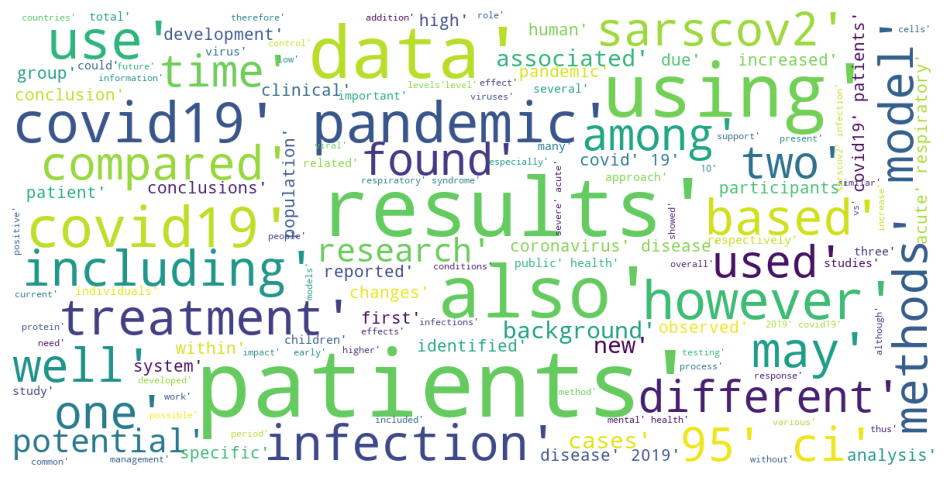

In [ ]:
show_wordcloud(text2)

In [ ]:
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string
# tockenize abstract
meta_df_tokens = meta_df1.abstract_x.fillna('').apply(preprocess_string)

In [ ]:
meta_df_tokens[100]

['sporad',
 'amyotroph',
 'later',
 'sclerosi',
 'sal',
 'common',
 'form',
 'al',
 'molecular',
 'mechan',
 'underli',
 'cellular',
 'damag',
 'motor',
 'neuron',
 'degener',
 'remain',
 'elus',
 'identifi',
 'molecular',
 'signatur',
 'sal',
 'perform',
 'genomewid',
 'express',
 'profil',
 'laser',
 'captur',
 'microdissectionenrich',
 'surviv',
 'motor',
 'neuron',
 'mn',
 'lumbar',
 'spinal',
 'cord',
 'sal',
 'patient',
 'rostral',
 'onset',
 'caudal',
 'progress',
 'correct',
 'immunolog',
 'background',
 'discov',
 'highli',
 'specif',
 'gene',
 'express',
 'signatur',
 'sal',
 'associ',
 'phosphoryl',
 'tdp',
 'ptdp',
 'patholog',
 'transcriptom',
 'patholog',
 'correl',
 'identifi',
 'casein',
 'kinas',
 'csnke',
 'mrna',
 'tightli',
 'correl',
 'level',
 'ptdp',
 'sal',
 'patient',
 'enhanc',
 'crosslink',
 'immunoprecipit',
 'human',
 'sal',
 'patient',
 'healthi',
 'controlderiv',
 'frontal',
 'cortex',
 'reveal',
 'tdp',
 'bind',
 'directli',
 'regul',
 'express',
 'csnke

In [ ]:
from rank_bm25 import BM25Okapi

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import preprocess_documents, preprocess_string
# tockenize abstract
meta_df_tokens = meta_df1.abstract_x.fillna('').apply(preprocess_string)

# tockenize abstract
pd_merge_abstract_tokens = pd_merge_all.abstract_x.fillna('').apply(preprocess_string)  # tokenize each abstract to word
# tockenize the text
pd_merge_text_tokens = pd_merge_all.text.fillna('').apply(preprocess_string)  # tokeni

In [ ]:
meta_df_tokens[:100]

0     [surfact, proteind, spd, particip, innat, resp...
1     [hivaid, emerg, infecti, diseas, saw, emerg, s...
2     [viral, recombin, dramat, impact, evolut, epid...
3     [background, human, rhinovirus, hrv, frequent,...
4     [background, cross, viru, lacv, famili, bunyav...
                            ...                        
95    [background, influenza, epidemiolog, virolog, ...
96    [object, studi, aim, evalu, psychometr, proper...
97    [porcin, respiratori, diseas, complex, prdc, c...
98    [method, protect, radiationinduc, lung, injuri...
99    [spread, epidem, determin, structur, contact, ...
Name: abstract_x, Length: 100, dtype: object

In [ ]:
nltk.download('omw-1.4')
from nltk.corpus import wordnet
def find_syn_ant(word):
    synonyms = []
    antonyms = []

    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
            if l.antonyms():
                antonyms.append(l.antonyms()[0].name())
    return set(synonyms)

print(find_syn_ant("smoking"))

[nltk_data] Downloading package omw-1.4 to C:\Users\harsh
[nltk_data]     vardhan\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\harsh vardhan/nltk_data'
    - 'd:\\1_SEM-06\\4 NLP\\PROJECT\\RELEVANT-DOCUMENT-RETRIEVAL-main\\RELEVANT-DOCUMENT-RETRIEVAL-main\\venv\\nltk_data'
    - 'd:\\1_SEM-06\\4 NLP\\PROJECT\\RELEVANT-DOCUMENT-RETRIEVAL-main\\RELEVANT-DOCUMENT-RETRIEVAL-main\\venv\\share\\nltk_data'
    - 'd:\\1_SEM-06\\4 NLP\\PROJECT\\RELEVANT-DOCUMENT-RETRIEVAL-main\\RELEVANT-DOCUMENT-RETRIEVAL-main\\venv\\lib\\nltk_data'
    - 'C:\\Users\\harsh vardhan\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
from rank_bm25 import BM25Okapi

In [ ]:
bm25_index = BM25Okapi(meta_df_tokens.tolist())


def search(search_string, num_results=10):  # can change the num_results to top 50 or more
    search_tokens = preprocess_string(search_string)
    scores = bm25_index.get_scores(search_tokens)
    top_indexes = np.argsort(scores)[::-1][:num_results]
    return top_indexes

In [ ]:
# now show the abstract of the top index
# Create a BM25Okapi index from the tokens. Implement a search function that returns the top 10 results from the search.
# Note that in search we are asking the index to return the dataframe indexes of the tokens most similar to the search string.
meta_df1.loc[search('novel coronavirus treatment')][['abstract_x', 'publish_time']]

,abstract_x,publish_time
3169,background novel coronavirus sarscov2 outbreak...,2020-08-20
2838,novel coronavirus disease covid19 pandemic cau...,2020-05-29
5895,severe acute respiratory syndrome coronavirus2...,2020-11-05
6239,novel coronavirus disease affecting million pe...,2020-06-28
7903,coronavirus disease 2019 covid19 expanding rap...,2020-06-04
3408,outbreak pneumonia caused novel coronavirus sa...,2020-08-03
8624,newly emerging novel coronavirus appeared rapi...,2020-07-15
4776,coronavirus disease 2019 covid19 caused novel ...,2021-06-10
7272,well documented early days 2019 novel coronavi...,2020-05-20
3082,amidst ongoing coronavirus covid19 pandemic ho...,2020-10-24


In [ ]:
meta_df.loc[search('Smoking')][['abstract', 'publish_time']]

,abstract,publish_time
4877,Astrocytes isolated from the brain of newborn ...,1992
3140,Deubiquitinating enzymes (DUBs) are important ...,2018-04-05
3109,Identifying effective antivirals for treating ...,2018-03-22
7019,NaN,2007-04-01
6223,Hepatitis C virus (HCV) nonstructural protein ...,2016-06-17
8553,BACKGROUND: A review of the literature showed ...,2013-06-27
2487,Microbial communities reside in healthy tissue...,2016-11-28
586,BACKGROUND: Allogeneic bone marrow transplanta...,2011-07-06
7031,NaN,2014-08-28
8406,NaN,2020-02-19


In [ ]:
string1='smoking, pre-existing pulmonary disease'
string2= 'Co-infections (determine whether co-existing respiratory/viral infections make the virus more transmissible or virulent) and other co-morbidities'
string3= 'Neonates and pregnant women'
string4=  'Socio-economic and behavioral factors to understand the economic impact of the virus and whether there were differences'
string5= 'Transmission dynamics of the virus, including the basic reproductive number, incubation period, serial interval, modes of transmission and environmental factors'
string6=  'Severity of disease, including risk of fatality among symptomatic hospitalized patients, and high-risk patient groups'
string7=  'Susceptibility of populations'
string8= 'Public health mitigation measures that could be effective for control'

In [ ]:
def Search(query):
    return meta_df1.loc[search(query)][['abstract_x', 'publish_time','title_x']]

In [ ]:
Search("quantifying the role of social distancing personal protection and case detection in mitigating covid19 outbreak in ontario canada")

,abstract_x,publish_time,title_x
6117,public health interventions implemented mitiga...,2020-05-26,quantifying the role of social distancing pers...
5387,covid19 mitigation commonly involves contact t...,2020-12-02,smart investment of virus rna testing resource...
3747,objective describe immediate impact covid 19 p...,2021-05-31,the impact of the covid‐19 pandemic on the ont...
5013,cdc recommends number mitigation behaviors pre...,2020-10-30,covid19 mitigation behaviors by age group — un...
4020,motivation early detection isolation covid19 p...,2021-02-08,covidhunter an accurate flexible and environme...
5495,covid19 pandemic necessitated public health me...,2020-12-31,understanding the impact of the covid19 pandem...
8052,development strategies mitigating severity cov...,2021-03-22,sarscov2 transmission and control in a hospita...
1707,abstract background since beginning covid19 pa...,2021-10-07,time trends in social contacts before and duri...
4103,background 2020 us schools closed due sarscov2...,2021-01-29,the experience of two independent schools with...
8179,abstract financial incentives fis green buildi...,2021-01-31,evaluation of financial incentives for green b...


In [ ]:
Search(string1)

,abstract_x,publish_time,title_x
3134,background aims severe acute respiratory syndr...,2021-05-03,liver injury sars‐cov‐2 infection and covid‐19...
6223,ongoing covid19 pandemic placed spotlight infe...,2020-11-19,smoking and covid19 what we know so far
4877,smoke inhalation induced acute respiratory dis...,2015-05-14,role of angiotensinconverting enzyme ace and a...
2129,complications pneumomediastinum andor pneumoth...,2020-10-14,covid19 with spontaneous pneumothorax pneumome...
7800,legionnaires disease primarily pneumonic illne...,2020-09-22,legionnaires disease presenting as diarrhea a ...
4479,objective report four patients coronavirus dis...,2020-07-09,posterior reversible encephalopathy syndrome i...
4198,background whilst covid 19 diagnostic test hig...,2020-12-19,patterns of repeated diagnostic testing for co...
438,pneumonia inflammatory diseases pulmonary syst...,2021-01-29,role of apoptotic cell clearance in pneumonia ...
3140,raise concerns effectiveness professor hameds ...,2021-02-09,comment on underwaterseal evacuation of surgic...
6361,situ pulmonary thrombosis may exist covid19 pn...,2020-10-23,in situ pulmonary thrombosis in patients with ...


In [ ]:
Search(string2)

,abstract_x,publish_time,title_x
5571,vaccines reduce clinical severity infection tr...,2020-12-03,no current evidence for risk of vaccinedriven ...
722,respiratory viral infections rvis common among...,2018-12-08,respiratory viral infections in transplant rec...
5452,respiratory viral infections frequent causes m...,2013-12-02,prolonged respiratory viral shedding in transp...
6626,viral infections important cause pediatric acu...,2016-11-24,viral infection in the development and progres...
5923,several severe respiratory virus infections em...,2012-06-08,virulence potential of fusogenic orthoreoviruses
153,influenza viruses cause annual epidemics occas...,2009-10-07,an update on swineorigin influenza virus ah1n1...
7363,world inundated global pandemic coronavirus di...,2021-06-28,presence detection and persistence of sarscov2...
4596,viral infections small mammals transient rarel...,2005-03-01,small mammal virology
6265,four decades cause type influenza virus infect...,2010-02-03,single assay for simultaneous detection and di...
7102,rna viruses known replicate low fidelity polym...,2019-09-19,impact of rna virus evolution on quasispecies ...


In [ ]:
Search('Smoking')

,abstract_x,publish_time,title_x
4877,smoke inhalation induced acute respiratory dis...,2015-05-14,role of angiotensinconverting enzyme ace and a...
3140,raise concerns effectiveness professor hameds ...,2021-02-09,comment on underwaterseal evacuation of surgic...
3109,background purpose study examine prevalence ef...,2020-06-25,current smoking former smoking and adverse out...
7019,background sexual gender minority young adults...,2021-07-30,an avatarled digital smoking cessation program...
6223,ongoing covid19 pandemic placed spotlight infe...,2020-11-19,smoking and covid19 what we know so far
8553,objective although evidence implicates striata...,2021-05-31,effect of varenicline on tardive dyskinesia a ...
2487,angiotensin converting enzyme ace2 identified ...,2020-09-29,overexpression of the sars‐cov‐2 receptor ace2...
586,background healthrelated quality life hrql gen...,2021-08-21,healthrelated quality of life in a general pop...
7031,documented disparities smoking behaviors among...,2021-06-12,perceptions and patterns of cigarette and ecig...
8406,japan dietary habits greatly changed since cor...,2021-06-14,factors associated with dietary change since t...


In [ ]:
Search(string3)

,abstract_x,publish_time,title_x
7420,rapid systematic review carried evaluate curre...,2020-04-27,to breastfeed or not to breastfeed lack of evi...
8067,perinatal consequences sarscov2 infection stil...,2021-04-22,prevalence clinical features and outcomes of s...
8146,objectives evaluation clinical course covid19 ...,2020-11-29,clinical course of novel covid19 infection in ...
2167,background covid19 pregnant women suggested im...,2021-02-25,evaluation of covid19 as a risk factor for mat...
6014,background considerable number systematic revi...,2021-01-12,maternal and neonatal characteristics and outc...
2248,purpose study explore relationship pregnant wo...,2021-10-26,the relationship between the fear of covid19 d...
1533,background pregnant women coronavirus disease ...,2021-09-03,clinical and pregnancy outcomes of covid19 amo...
4685,purpose evaluate anxiety depression pregnant w...,2020-10-03,investigation on the mental health status of p...
4910,objective pregnant women historically excluded...,2020-05-19,exclusion of pregnant women from clinical tria...
4612,background antenatal depression become common ...,2021-10-26,the prevalence of and factors associated with ...


In [ ]:
Search(string4)

,abstract_x,publish_time,title_x
7012,covid19 disrupted everyday life worldwide firs...,2021-04-12,societal impacts of pandemics comparing covid1...
1994,current social distancing measures impede covi...,2020-04-30,quantifying projected impact of social distanc...
2052,covid19 pandemic resulted significant social e...,2021-08-10,analyzing effects of the covid19 pandemic on r...
8312,background scarcity data health impacts associ...,2021-07-25,health effects from heat waves in france an ec...
6708,global pandemics new phenomenon occurred diffe...,2021-03-15,factors affecting voluntary selfisolation beha...
8112,covid19 pandemic burning world national health...,2020-06-10,covid19 outbreak in italy are we ready for the...
8389,paper studies impact sanitary protocols aimed ...,2020-12-24,covid19 contagion economic activity and busine...
6955,politics may color interpretations facts thus ...,2021-06-01,risk perceptions and politics evidence from th...
4864,value theory forms bedrock several economic pa...,2020-08-25,the value of value theory for ecological econo...
5345,risk management plays key role uncertain times...,2021-08-03,flexibility and resilience in corporate decisi...


In [ ]:
Search(string5)

,abstract_x,publish_time,title_x
2716,introduction dynamic tools methods assess ongo...,2020-07-16,timedependent dynamic transmission potential a...
4463,background purpose many statutes comprising sh...,2020-06-17,asymptomatic and presymptomatic transmission o...
2662,epidemiological model describes transmission d...,2021-02-09,on the transmission dynamics of sarscov2 in a ...
5003,background coronavirus disease 2019 covid19 ca...,2020-07-16,basic reproduction number and predicted trends...
7487,background knowledge epidemiological features ...,2020-06-18,reconstruction of transmission pairs for novel...
1860,determinants covid19 clinical severity commonl...,2021-08-31,covid19 severity determinants inferred through...
4998,paper relates data wellcome sanger institute u...,2021-06-03,interim estimates of increased transmissibilit...
6992,background reported world health organization ...,2020-02-28,a mathematical model for simulating the phaseb...
7688,background south korea outbreak middle east re...,2017-06-13,estimation of basic reproduction number of the...
6588,background middle east respiratory syndrome co...,2016-06-30,outbreaks of middle east respiratory syndrome ...


In [ ]:
Search(string6)

,abstract_x,publish_time,title_x
7625,objective evaluate factors predicting severe s...,2021-02-12,predictors of severe symptomatic laboratorycon...
2754,background aimed reveal chronic diseases age g...,2021-04-08,the effect of chronic diseases age and gender ...
5731,background although laboratory tests become in...,2021-02-19,implications of laboratory tests in disease gr...
8376,aims many studies explored clinical characteri...,2020-12-17,elevated α‐hydroxybutyrate dehydrogenase as an...
5505,introduction severe acute respiratory syndrome...,2021-03-14,influence of baseline physical activity as a m...
8564,background 2009 severe fever thrombocytopenia ...,2013-11-13,clinical features and factors associated with ...
3830,background studied labconfirmed covid19 infect...,2021-08-13,patterns and descriptors of covid19 testing an...
7168,background studies patients heart failure hf h...,2021-07-17,características clínicas y factores de riesgo ...
3285,background aimed investigate clinical characte...,2020-11-18,clinical characteristics and risk factors for ...
6220,paper aim understanding broad spectrum factors...,2021-06-16,predictive value of comorbid conditions for co...


In [ ]:
Search(string7)

,abstract_x,publish_time,title_x
2913,genetic analysis pathogen genomes powerful app...,2013-03-19,coalescent inference for infectious disease me...
2966,abstract increasingly common infectious diseas...,2005-03-01,mathematical prediction in infection
5434,background carboxypeptidase protein called ace...,2020-12-02,ace2 and tmprss2 polymorphisms in various dise...
7690,deterministic model formulated employed analys...,2021-07-27,dynamics of tuberculosis tb with drug resistan...
6478,model calculate fraction infected population n...,2020-09-10,heterogeneity and superspreading effect on her...
3139,research work present mathematical model novel...,2020-07-01,study of transmission dynamics of novel covid1...
7252,global pandemic outbreak coronavirus disease 2...,2021-07-28,remote management of prosthodontic emergencies...
4653,severe acute respiratory syndrome coronavirus ...,2020-04-17,association between abo blood groups and clini...
3372,current pandemic brought renewed appreciation ...,2021-06-09,the nature of immune responses to influenza va...
4574,covid19 pandemic markedly impacted cultural po...,2021-08-03,association between hla genotypes and covid19 ...


In [ ]:
Search(string8)

,abstract_x,publish_time,title_x
6117,public health interventions implemented mitiga...,2020-05-26,quantifying the role of social distancing pers...
2176,mitigation measures including stayathome order...,2020-11-13,declines in sarscov2 transmission hospitalizat...
1919,novel coronavirus sarscov2 disease causes covi...,2020-04-07,the impact of public safety measures on the sp...
3163,midst global pandemic prevention methods stand...,2021-08-04,perception versus preference the role of selfa...
1926,data collection processing via digital public ...,2020-04-21,digital tools against covid19 framing the ethi...
8052,development strategies mitigating severity cov...,2021-03-22,sarscov2 transmission and control in a hospita...
8419,beginning 2020 global outbreak novel coronavir...,2021-04-15,governance capability of the public health sys...
3241,testimony us congress march 11 2020 members ho...,2020-08-12,public health lessons learned from biases in c...
7196,countries affected covid19 pandemic repeatedly...,2021-03-26,drastic reductions in mental wellbeing observe...
7296,introduction widespread availability effective...,2021-04-30,perceived social norms as determinants of adhe...


In [ ]:
Search("pregnant women")

,abstract_x,publish_time,title_x
2248,purpose study explore relationship pregnant wo...,2021-10-26,the relationship between the fear of covid19 d...
1533,background pregnant women coronavirus disease ...,2021-09-03,clinical and pregnancy outcomes of covid19 amo...
4685,purpose evaluate anxiety depression pregnant w...,2020-10-03,investigation on the mental health status of p...
4910,objective pregnant women historically excluded...,2020-05-19,exclusion of pregnant women from clinical tria...
4612,background antenatal depression become common ...,2021-10-26,the prevalence of and factors associated with ...
7420,rapid systematic review carried evaluate curre...,2020-04-27,to breastfeed or not to breastfeed lack of evi...
7883,maternal fetal surgery mfs encompasses range i...,2021-10-21,maternal–fetal surgery does recognising fetal ...
3925,approximately onethird infected pregnant women...,2020-06-28,is covid19 similar in pregnant and nonpregnant...
8067,perinatal consequences sarscov2 infection stil...,2021-04-22,prevalence clinical features and outcomes of s...
4402,introduction sarscov2 infection poses particul...,2021-06-29,isidog consensus guidelines on covid19 vaccina...


In [ ]:
from flask import Flask, request, render_template
app = Flask(__name__)

@app.route("/", methods =["GET", "POST"])
def home():
    if request.method == "POST":
       query = request.form.get("search")
       return render_template("result.html",title=Search(query)['title_x'].to_numpy(),publish=Search(query)['publish_time'].to_numpy(),abstract=Search(query)['abstract_x'].to_numpy(),len = len(Search(query)['abstract_x'].to_numpy()))
    return render_template('NLP.html')


if __name__ == '__main__':
    app.run(use_reloader = False,port= 8000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8000
Press CTRL+C to quit
127.0.0.1 - - [31/Mar/2023 01:03:53] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [31/Mar/2023 01:03:53] "GET /favicon.ico HTTP/1.1" 404 -
[2023-03-31 01:03:58,216] ERROR in app: Exception on / [POST]
Traceback (most recent call last):
  File "d:\1_SEM-06\4 NLP\PROJECT\RELEVANT-DOCUMENT-RETRIEVAL-main\RELEVANT-DOCUMENT-RETRIEVAL-main\venv\lib\site-packages\flask\app.py", line 2528, in wsgi_app
    response = self.full_dispatch_request()
  File "d:\1_SEM-06\4 NLP\PROJECT\RELEVANT-DOCUMENT-RETRIEVAL-main\RELEVANT-DOCUMENT-RETRIEVAL-main\venv\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "d:\1_SEM-06\4 NLP\PROJECT\RELEVANT-DOCUMENT-RETRIEVAL-main\RELEVANT-DOCUMENT-RETRIEVAL-main\venv\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "d:\1_SEM-06\4 NLP\PROJECT\RELEVANT-DOCUMENT-RETRIEVAL-main\RELEVANT-DOCUMENT-RETRI